<a href="https://colab.research.google.com/github/AleS900/MultilayerPerceptronImageClassifier/blob/main/MultilayerPerceptronImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Artificial Neural Network with Perceprton

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
 
import matplotlib.pyplot as plt
import numpy as np

## Exploring CIFAR10 dataset images

In [2]:
transform = transforms.ToTensor()

In [3]:
data_path = '../data_cifar/'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data_cifar/cifar-10-python.tar.gz to ../data_cifar/
Files already downloaded and verified


In [4]:
print("Training: ", len(cifar10_train))
print("Testing: ", len(cifar10_test))

Training:  50000
Testing:  10000


In [5]:
type(cifar10_train)

torchvision.datasets.cifar.CIFAR10

In [6]:
type(cifar10_test)

torchvision.datasets.cifar.CIFAR10

In [7]:
type(cifar10_train[0])

tuple

In [8]:
image, label = cifar10_train[0]
type(image)

torch.Tensor

In [9]:
image.shape

torch.Size([3, 32, 32])

In [10]:
classes = cifar10_train.classes
print (classes)
print(label)
print(classes[label])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
6
frog


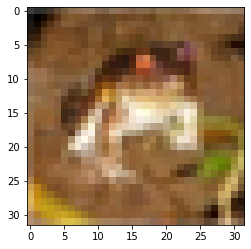

In [11]:
plt.imshow(image.permute(1, 2, 0))

In [12]:
torch.manual_seed(80)
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=500, shuffle=False)

## Building the model

In [13]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)
        #self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [14]:
torch.manual_seed(80)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
for param in model.parameters():
  print(param.numel())

368640
120
10080
84
840
10


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [40]:
for images, labels in train_loader:
  break

In [41]:
images.shape

torch.Size([100, 3, 32, 32])

In [43]:
images.view(-1, 3072).shape

torch.Size([100, 3072])

## Training the model

In [23]:
import time
start_time = time.time()

epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct  = []

for i in range(epochs):
   
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0
    

    for b_iter, (X_train, y_train) in enumerate(train_loader):
      b_iter +=1

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)
      
      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr
      
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if b_iter % 100 == 0:
        
        accuracy = trn_corr.item()*100 / (100*b_iter)
        print( f'epoch: {i} batch {b_iter} loss:{loss.item()} accuracy:{accuracy} ')
    
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
      
      for b_iter, (X_test, y_test) in enumerate(test_loader):
        
        y_val = model(X_test.view(500, -1))
        
        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()
     
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print( f' Duration: {total_time/60} mins')

epoch: 0 batch 100 loss:1.865755558013916 accuracy:41.57 
epoch: 0 batch 200 loss:1.679814338684082 accuracy:42.37 
epoch: 0 batch 300 loss:1.6127328872680664 accuracy:42.57333333333333 
epoch: 0 batch 400 loss:1.5603410005569458 accuracy:42.8225 
epoch: 0 batch 500 loss:1.6280001401901245 accuracy:42.838 
epoch: 1 batch 100 loss:1.5794625282287598 accuracy:44.02 
epoch: 1 batch 200 loss:1.7955302000045776 accuracy:43.66 
epoch: 1 batch 300 loss:1.7909549474716187 accuracy:43.75 
epoch: 1 batch 400 loss:1.6981221437454224 accuracy:43.6175 
epoch: 1 batch 500 loss:1.734384298324585 accuracy:43.698 
epoch: 2 batch 100 loss:1.5864125490188599 accuracy:43.63 
epoch: 2 batch 200 loss:1.4711804389953613 accuracy:43.795 
epoch: 2 batch 300 loss:1.4988877773284912 accuracy:44.03333333333333 
epoch: 2 batch 400 loss:1.3444699048995972 accuracy:44.1675 
epoch: 2 batch 500 loss:1.567118525505066 accuracy:44.4 
epoch: 3 batch 100 loss:1.3794348239898682 accuracy:44.98 
epoch: 3 batch 200 loss:1.60

In [27]:
#plt.plot(train_losses, label= "Training loss")
#plt.plot(test_losses, label= "Test loss")
#plt.legend()

In [24]:
train_accuracy =[t/500 for t in train_correct ] 
train_accuracy

[tensor(42.8380),
 tensor(43.6980),
 tensor(44.4000),
 tensor(45.0760),
 tensor(45.4620),
 tensor(46.0760),
 tensor(46.6120),
 tensor(47.0600),
 tensor(47.4140),
 tensor(47.9640)]

In [28]:
test_accuracy =[t/100 for t in test_correct ] 
test_accuracy

[tensor(43.6200),
 tensor(43.3900),
 tensor(43.3700),
 tensor(44.7500),
 tensor(45.3700),
 tensor(45.3000),
 tensor(46.2500),
 tensor(45.7800),
 tensor(46.8700),
 tensor(45.7400)]

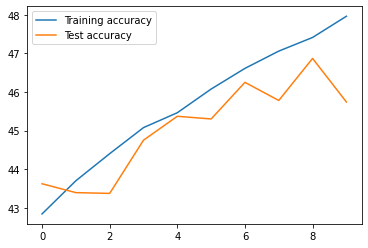

In [29]:
plt.plot(train_accuracy, label= "Training accuracy")
plt.plot(test_accuracy, label= "Test accuracy")
plt.legend()

In [30]:
test_load_all = DataLoader(cifar10_test, batch_size=10000, shuffle=False)

In [31]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all: 
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [32]:
100*correct.item()/len(cifar10_test)

45.74

In [33]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[506,  16,  92,  44,  66,  26,  10,  36,  90,  24],
       [126, 801,  95, 128,  69, 104,  78,  98, 179, 387],
       [ 26,   2, 201,  44,  77,  50,  30,  34,   3,   3],
       [ 17,  13, 110, 323,  60, 214, 111,  60,  22,  21],
       [ 30,   9, 159,  46, 367,  64, 108,  73,  10,   5],
       [ 10,  10,  62, 148,  45, 298,  40,  50,  12,   9],
       [ 22,  10, 143, 113, 157,  91, 546,  42,   7,  23],
       [ 22,  15,  70,  43,  93,  76,  33, 480,  12,  25],
       [188,  49,  42,  43,  38,  46,  22,  24, 615,  66],
       [ 53,  75,  26,  68,  28,  31,  22, 103,  50, 437]])

In [34]:
img = images[0].view(1, 3072)
 
# we are turning off the gradients
with torch.no_grad():
    model_prediction = model.forward(img)

[0.06212114 0.23678972 0.04952177 0.22529    0.00355042 0.0665048
 0.03858936 0.00529957 0.00225777 0.31007534]


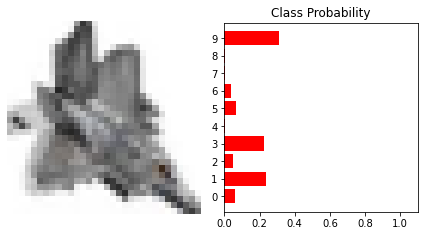

In [44]:
probabilities = F.softmax(model_prediction, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
img = img.view(3, 32, 32)
ax1.imshow(img.permute(1, 2, 0).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

In [39]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [36]:
test_load_all = DataLoader(cifar10_test, batch_size=64, shuffle=False)

In [37]:
images, labels = next(iter(test_load_all))
 
with torch.no_grad():
  images, labels = images, labels
  preds = model(X_test.view(len(X_test),-1))
 
images_np = [i.mean(dim=0).cpu().numpy() for i in images]
class_names = cifar10_test.classes

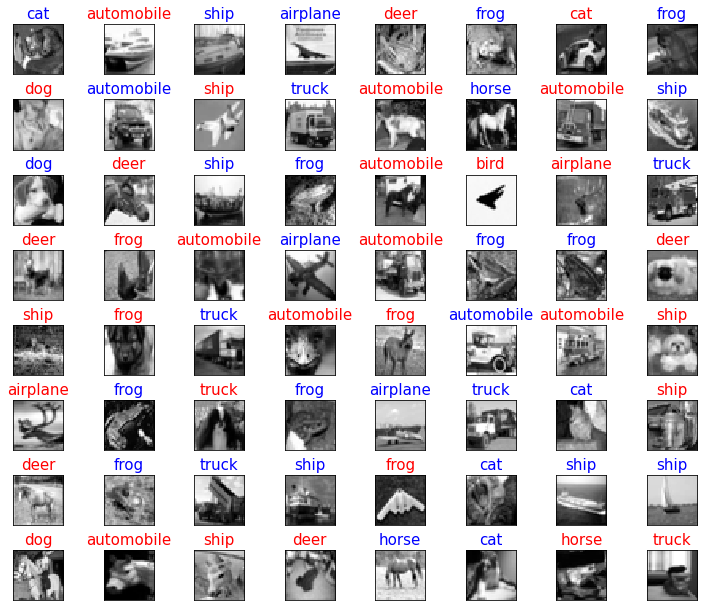

In [38]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)
 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation='nearest')
    color = "blue" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color=color, fontsize=15)

## Exploring MNIST dataset images

In [45]:
#Define transform to normalize data
transform =  transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307),(0.3081))])

# Download and load the training data
train_set =  datasets.MNIST('DATA_MNIST/', download=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

validation_set = datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transform)
validation_loader= torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting DATA_MNIST/MNIST/raw/train-images-idx3-ubyte.gz to DATA_MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting DATA_MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to DATA_MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting DATA_MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to DATA_MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting DATA_MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to DATA_MNIST/MNIST/raw



In [46]:
training_data=iter(trainLoader)
images, labels = training_data.next()
print(type(images)) # Checking de datatype
print(images.shape) # the size of the image
print(labels.shape) # the size of the labels

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


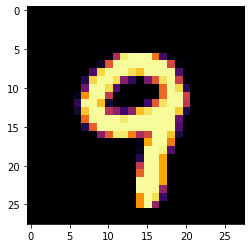

In [48]:
plt.imshow(images[42].numpy().squeeze(), cmap='inferno')

In [50]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    self.dropout = nn.Dropout(p=0.5)

  def forward(self, x):
    x = x.view(x.size(0), -1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = self.dropout(F.relu(self.fc4(x)))
    return x


In [52]:
model = Network()
model.to("cpu")

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [53]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [56]:
epochs =  20
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [],[]

for epoch in range(epochs):
      total_train_loss = 0
      total_val_loss = 0
      model.train()
      total = 0
      #training our model
      for idx, (image, label) in enumerate(trainLoader):
          image, label =  image.to('cpu'), label.to('cpu')

          optimizer.zero_grad()
          pred = model(image)

          loss =  criterion(pred, label)
          total_train_loss += loss.item()

          loss.backward()
          optimizer.step()

          pred  = torch.nn.functional.softmax(pred, dim=1)
          for i,p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total +=1

      accuracy_train = total / len(train_set)
      accuracy_total_train.append(accuracy_train)

      total_train_loss = total_train_loss / (idx + 1)
      train_loss.append(total_train_loss)

      # validating our model
      model.eval()
      total = 0
      for idx, (image, label) in enumerate(validation_loader):
          image, label = image.to('cpu'), label.to('cpu')
          pred = model(image)
          loss =  criterion(pred, label)
          total_val_loss += loss.item()

          pred =  torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
            if label[i] == torch.max(p.data,0)[1]:
              total += 1
      
      accuracy_val =  total / len(validation_set)
      accuracy_total_val.append(accuracy_val)

      total_val_loss = total_val_loss / (idx + 1)
      val_loss.append(total_val_loss)

      if epoch % 5 == 0:
        print("Epoch {}/{}  ".format(epoch,epochs),
              "Training Loss: {:.4f}  ".format(total_train_loss),
              "Testing Loss: {:.4f}  ".format(total_val_loss),
              "Train Accuracy: {:.4f}  ".format(accuracy_train),
              "Test Accuracy: {:.4f}  ".format(accuracy_val)
        )







Epoch 0/20   Training Loss: 1.7057   Testing Loss: 1.0316   Train Accuracy: 0.4255   Test Accuracy: 0.8669  
Epoch 5/20   Training Loss: 1.4208   Testing Loss: 0.5381   Train Accuracy: 0.4998   Test Accuracy: 0.9328  
Epoch 10/20   Training Loss: 1.3463   Testing Loss: 0.4127   Train Accuracy: 0.5148   Test Accuracy: 0.9495  
Epoch 15/20   Training Loss: 1.3052   Testing Loss: 0.3396   Train Accuracy: 0.5246   Test Accuracy: 0.9585  


In [58]:
#plt.plot(train_losses, label= "Training loss")
#plt.plot(test_losses, label= "Test loss")
#plt.legend()
#plt.grid()

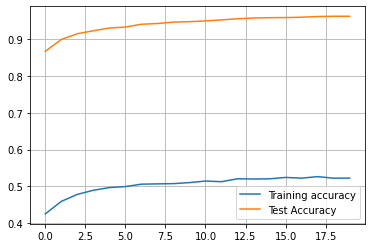

In [59]:
plt.plot(accuracy_total_train, label= "Training accuracy")
plt.plot(accuracy_total_val, label= "Test Accuracy")
plt.legend()
plt.grid()

In [65]:
img =  images[2].view(1, 784)
print(img.shape)

# Me da paja
with torch.no_grad():
  logits = model.forward(img)

print(logits)

torch.Size([1, 784])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         3.4074]])


[0.06212114 0.23678972 0.04952177 0.22529    0.00355042 0.0665048
 0.03858936 0.00529957 0.00225777 0.31007534]


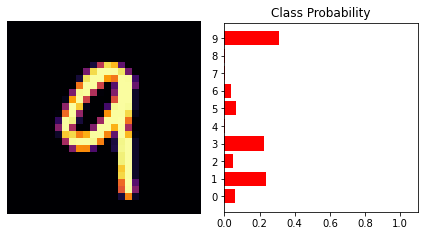

In [66]:
probabilities = F.softmax(model_prediction, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
ax1.imshow(img.view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

In [67]:
images, labels = next(iter(validation_loader))
 
with torch.no_grad():
  images, labels = images.to("cpu"), labels.to("cpu")
  preds = model(images)
 
images_np = [i.mean(dim=0).cpu().numpy() for i in images]
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

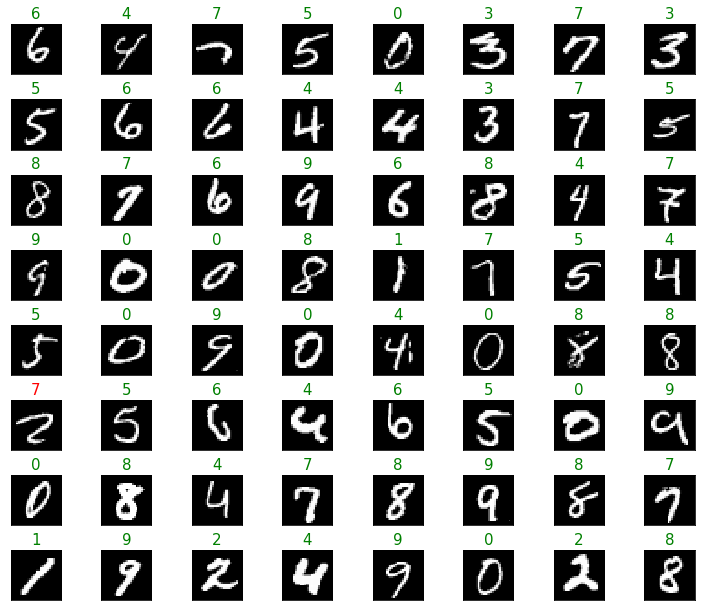

In [68]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)
 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation='nearest')
    color = "green" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color=color, fontsize=15)